# Multi class classification

1. Become one with the data
2. Preprocess the data
3. Create a Model
4. Fit the model
5. Evaluate the model
6. Adjust hyperparameters and improve the model

### 1. Become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', "r")
zip_ref.extractall()
zip_ref.close()

In [10]:
import os

dataset_path = "../datasets/10_food_classes_all_data"

for dirpath, dirnames, filenames in os.walk(dataset_path):
    print(f"dirpath: { dirpath } ---> dirnames: { len(dirnames) } ---> Count: { len(filenames) }")

dirpath: ../datasets/10_food_classes_all_data ---> dirnames: 2 ---> Count: 0
dirpath: ../datasets/10_food_classes_all_data/test ---> dirnames: 10 ---> Count: 0
dirpath: ../datasets/10_food_classes_all_data/test/fried_rice ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/grilled_salmon ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/hamburger ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/chicken_wings ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/ramen ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/sushi ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/ice_cream ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/chicken_curry ---> dirnames: 0 ---> Count: 250
dirpath: ../datasets/10_food_classes_all_data/test/steak ---> dirnames: 0 ---> Cou

In [11]:
train_dir = dataset_path + '/train/'
test_dir = dataset_path + '/test/'

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #setup the target directory
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"SHAPE: {img.shape}")
    
    return img

In [13]:
## Get class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


SHAPE: (512, 512, 3)


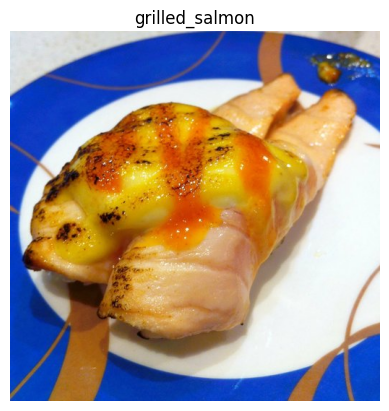

In [14]:
## Visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [15]:
## Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), batch_size=16)

test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), batch_size=16)

train_images, train_labels = train_data.next()
test_images, test_labels = test_data.next()


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [17]:
history_1 = model_1.fit(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
469/469 [==============================] - 261s 551ms/step - loss: 2.2767 - accuracy: 0.1364 - val_loss: 2.2373 - val_accuracy: 0.1720
Epoch 2/5
469/469 [==============================] - 258s 549ms/step - loss: 2.2067 - accuracy: 0.1963 - val_loss: 2.1734 - val_accuracy: 0.2076
Epoch 3/5
469/469 [==============================] - 264s 562ms/step - loss: 2.1234 - accuracy: 0.2269 - val_loss: 2.1073 - val_accuracy: 0.2408
Epoch 4/5
469/469 [==============================] - 257s 547ms/step - loss: 2.0478 - accuracy: 0.2728 - val_loss: 2.0587 - val_accuracy: 0.2932
Epoch 5/5
469/469 [==============================] - 253s 539ms/step - loss: 1.9636 - accuracy: 0.3105 - val_loss: 1.9291 - val_accuracy: 0.3172


In [18]:
## Evaluate
model_1.evaluate(test_data)

157/157 [==============================] - 12s 78ms/step - loss: 1.9291 - accuracy: 0.3172


[1.9291203022003174, 0.3172000050544739]